<a href="https://colab.research.google.com/github/Mounaiyk/practice-data-manipulation/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import packages**

In [30]:
import requests
import json
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan

**Fetch Data**

In [ ]:
response = requests.get("https://anapioficeandfire.com/api/houses/378")
targaryen_house = response.json()
targaryen = []
# resp = requests.get(targaryen_house["swornMembers"][0])
# print(resp.json())
for x in targaryen_house["swornMembers"]:
  response = requests.get(x)
  targaryen.append(response.json())

**Select relevant data**

In [ ]:
def select_data(data):
  return {
      "name":data["name"],
      "gender":data["gender"],
      "culture":data["culture"],
      "born":data["born"],
      "died":data["died"],
      "titles":data["titles"],
  }

targaryens = []

for x in targaryen:
  targaryens.append(select_data(x))


**Create csv**

In [ ]:
columns = ["name", "gender", "culture", "born", "died", "titles"]

with open('targaryen.csv',"w", newline='' ) as file:
  f = csv.writer(file)
  f.writerow(columns)
  for t in targaryens:
    values = [t[c] for c in columns]
    f.writerow(values)

In [ ]:
df = pd.read_csv("targaryen.csv")

In [29]:
df['died'].isna().sum()

49

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


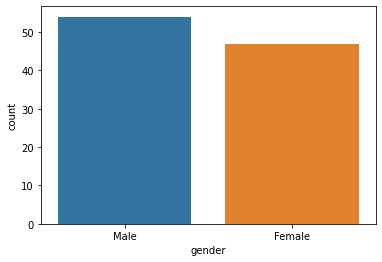

In [34]:
sns.countplot(df['gender'])

In [37]:
df["titles"] = df['titles'].replace("['']", nan)

In [43]:
no_titles = df["titles"].isna().sum()
titles = df.shape[0] - no_titles

print(titles)
print(no_titles)


79
22
